In [1]:
# This notebook presents a simulation of a pool of Renshaw cells (RC) with a current injected (iInjected) in their soma.

In [2]:
import sys
sys.path.insert(0, '..')
import time
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np

from Configuration import Configuration
from InterneuronPool import InterneuronPool
from SynapsesFactory import SynapsesFactory

In [3]:
conf = Configuration('confInjectedCurrentRenshawCellPool.rmto')
conf.simDuration_ms = 500 # Here I change simulation duration without changing the Configuration file.

In [4]:
# Time vector for the simulation
t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)

membPotential = np.zeros_like(t, dtype = 'd')

In [5]:
pools = []
pools.append(InterneuronPool(conf, 'RC'))

Syn = SynapsesFactory(conf, pools)



Interneuron Pool of RC built
Synaptic Noise on RC built
All the 350 synapses were built


In [6]:
# The simulation  itself

tic = time.clock()
for i in xrange(0,len(t)-1):
    # Here you can change the injected current in the Resnhaw cell during the simulation
    for j in pools[0].unit:
        j.iInjected = 5
    pools[1].atualizePool(t[i])    
    pools[0].atualizeInterneuronPool(t[i])
    membPotential[i] = pools[0].unit[175].v_mV # This command records the membrane potential of the RC with index 175.
toc = time.clock()
print str(toc - tic) + ' seconds'

591.667181 seconds


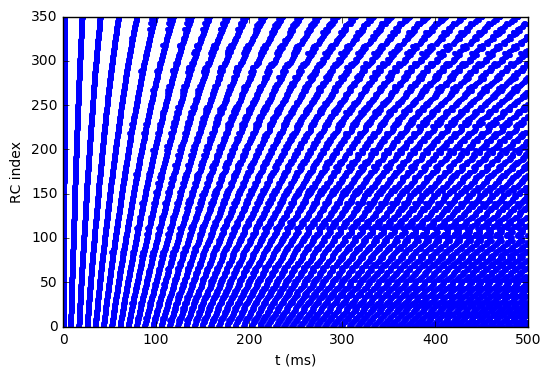

In [7]:
pools[0].listSpikes()

plt.plot(pools[0].poolSomaSpikes[:, 0],
    pools[0].poolSomaSpikes[:, 1]+1, '.')

plt.xlabel('t (ms)')
plt.ylabel('RC index')

plt.show()

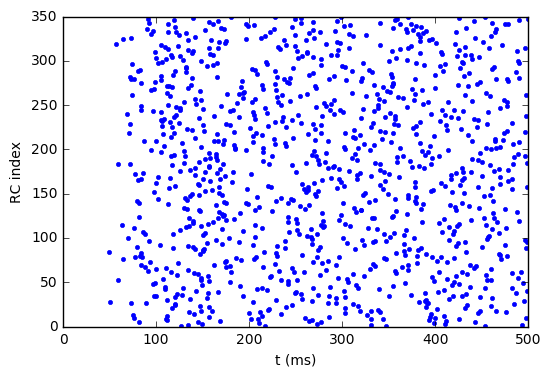

In [8]:
pools[1].listSpikes()

plt.plot(pools[1].poolTerminalSpikes[:, 0],
    pools[1].poolTerminalSpikes[:, 1]+1, '.')

plt.xlabel('t (ms)')
plt.ylabel('RC index')

plt.show()

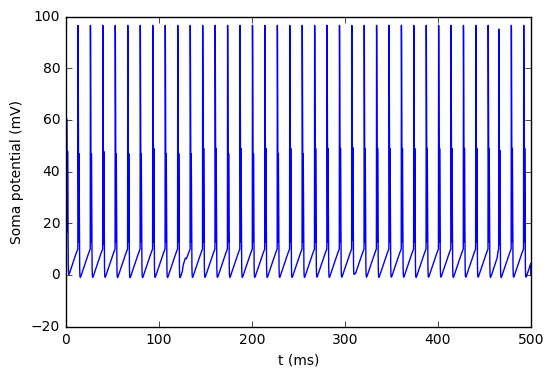

In [9]:
plt.figure()

plt.plot(t, membPotential, '-')

plt.xlabel('t (ms)')
plt.ylabel('Soma potential (mV)')

plt.show()

In [10]:
ISI = np.array([])
for i in xrange(0,len(pools[1].unit)):
    ISI = np.append(ISI, np.diff(np.reshape(np.array(pools[1].unit[i].terminalSpikeTrain), (-1,2))[:,0]))
print ISI

[  90.2   129.95  106.65  196.8   162.3   123.05  137.55  188.45   63.3
  132.    166.05   95.8   147.8   155.75  125.55   98.8   134.45  128.9
   94.75  183.    139.75   98.    129.25  108.    101.6   195.4   251.3
   93.6   161.9   102.7   142.7    76.3   128.8   135.5   159.8   145.7
  182.3   117.4   117.4   179.9   186.    128.8    82.75  150.8   170.25
  143.4   125.7   188.05  191.8   172.7   221.15   98.15  196.25  106.5
  153.4   178.65  121.8   105.85  116.85  162.1   121.35  157.85  138.75
  167.95  183.25  145.2   186.    133.45   95.5   157.05   78.1   146.25
   99.45  134.25  176.9    93.35  140.3    97.4    84.1   152.75  158.7
  197.55  190.1    99.85  130.9   103.75  136.7   140.75  213.9   177.05
  150.7   165.2   165.25  103.7   144.9   183.35  269.4   127.2   127.65
  113.25   84.75  157.4   103.5   208.4   175.05  221.55  198.05  107.6
  147.45  193.7   173.7    67.45   99.65   99.2   153.4   178.35  166.1
  122.3   217.2   124.3   131.45  155.85   89.1    78.5   1

(array([  18.,   76.,  151.,  174.,  151.,   70.,   51.,   14.,    5.,    2.]),
 array([  39.75 ,   65.625,   91.5  ,  117.375,  143.25 ,  169.125,
         195.   ,  220.875,  246.75 ,  272.625,  298.5  ]),
 <a list of 10 Patch objects>)

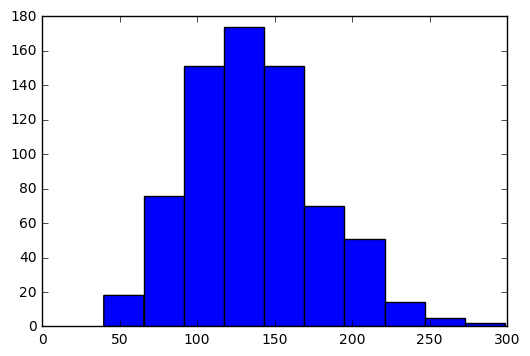

In [11]:
plt.figure()
plt.hist(ISI)

In [12]:
print pools[0].unit[175].threshold_mV

10.0143266476


In [13]:
print np.max(membPotential)

96.5765146344


In [14]:
np.exp(float("-inf"))

0.0

In [15]:
import math

In [16]:
math.exp(-(2-float("-inf")))

0.0

In [22]:
from joblib import Parallel, delayed
import multiprocessing
import time

inputs = range(10)
def processInput(i):
    return i * i +2

num_cores = multiprocessing.cpu_count()
#num_cores = 1
print num_cores
tic =time.clock()
results = Parallel(n_jobs=num_cores)(delayed(processInput)(i) for i in inputs)
toc =time.clock()
print toc -tic

8
0.039421


In [17]:
print results

[2, 3, 6, 11, 18, 27, 38, 51, 66, 83]
